In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import koreanize_matplotlib

In [2]:
data = pd.read_csv("./data/ecommerce.csv")
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


<Axes: >

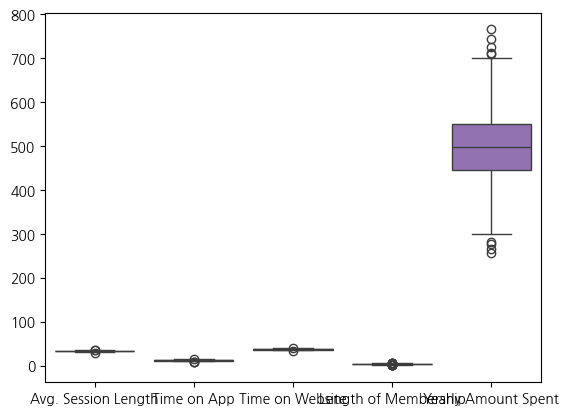

In [5]:
sns.boxplot(data)

<Axes: >

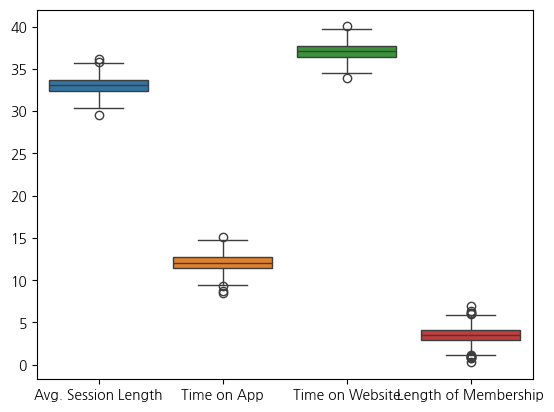

In [6]:
sns.boxplot(data.drop(['Yearly Amount Spent'],axis = 1))

In [7]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [8]:
data['Address'].value_counts()

Address
49791 Rachel Heights Apt. 898\nEast Drewborough, OR 55919-9528    1
835 Frank Tunnel\nWrightmouth, MI 82180-9605                      1
4547 Archer Common\nDiazchester, CA 06566-8576                    1
24645 Valerie Unions Suite 582\nCobbborough, DC 99414-7564        1
1414 David Throughway\nPort Jason, OH 22070-1220                  1
                                                                 ..
USNS Cardenas\nFPO AA 85439-9449                                  1
019 Elliott Tunnel Suite 190\nNicholsbury, WV 60804-4440          1
9495 Mary Fall Apt. 777\nGlassport, ND 17957-5596                 1
657 Judith Crossroad\nHancockchester, VI 75658-5788               1
8522 Regina Port Suite 782\nPort Kaitlin, TX 50501-7264           1
Name: count, Length: 500, dtype: int64

In [9]:
data['Address'].nunique()

500

In [10]:
data['Email'].nunique()

500

In [11]:
data = data.drop(['Email', 'Address', 'Avatar'],axis=1)
data

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


======================================== Avg. Session Length ========================================


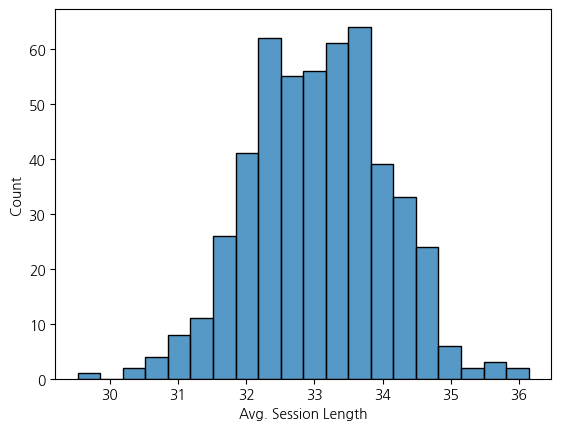

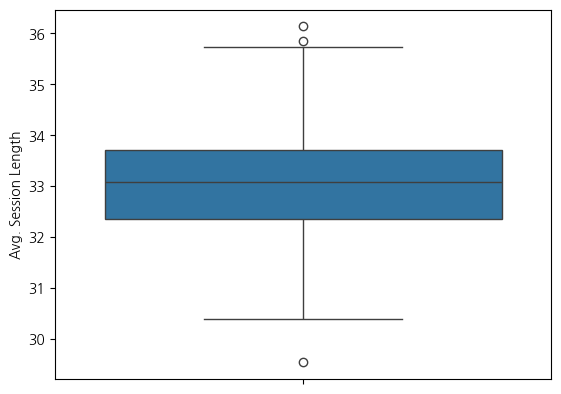

======================================== Time on App ========================================


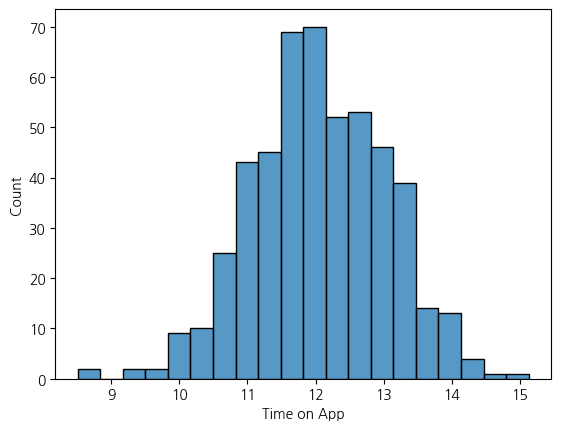

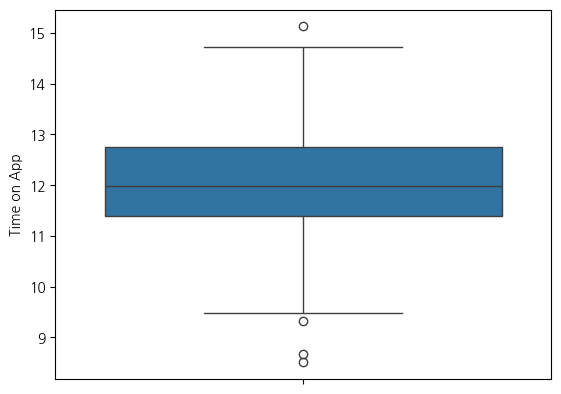

======================================== Time on Website ========================================


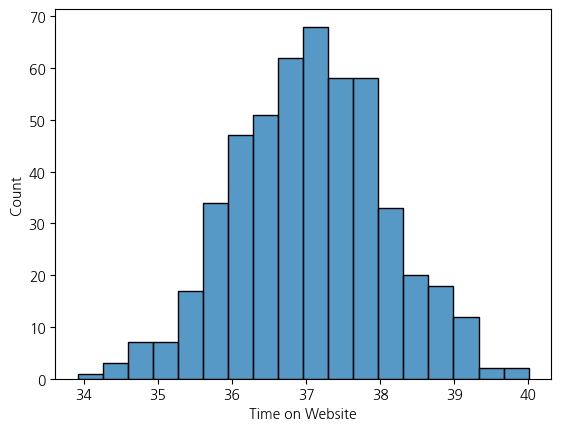

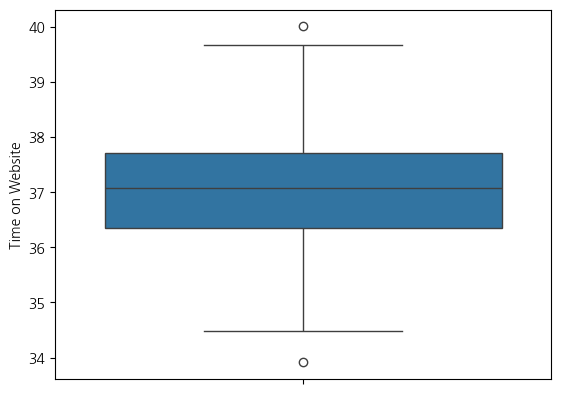

======================================== Length of Membership ========================================


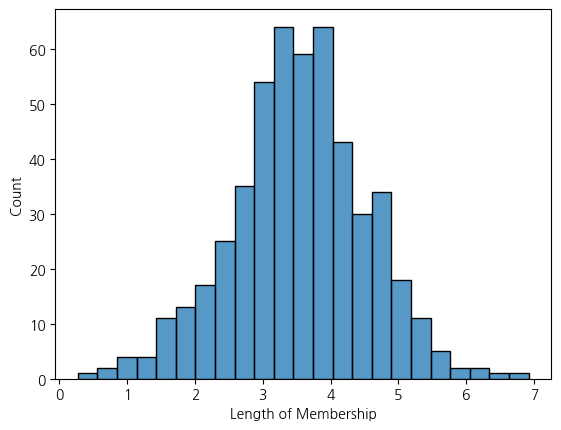

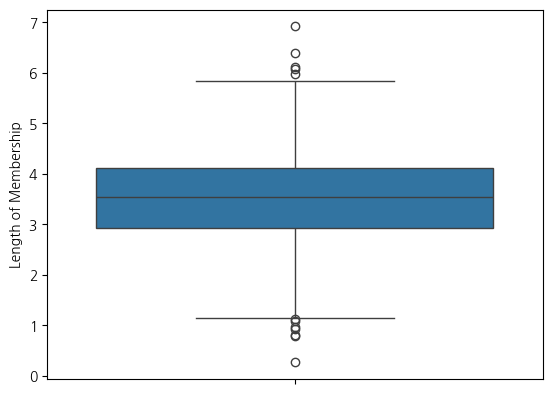

In [12]:
for col in data.columns[:-1]:
    print('='*40,col,'='*40)
    sns.histplot(data[col])
    plt.show()
    sns.boxplot(data[col])
    plt.show()

# 회귀분석에서는 독립변수간 상관관계가 매우 중요

In [13]:
data.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


<Axes: >

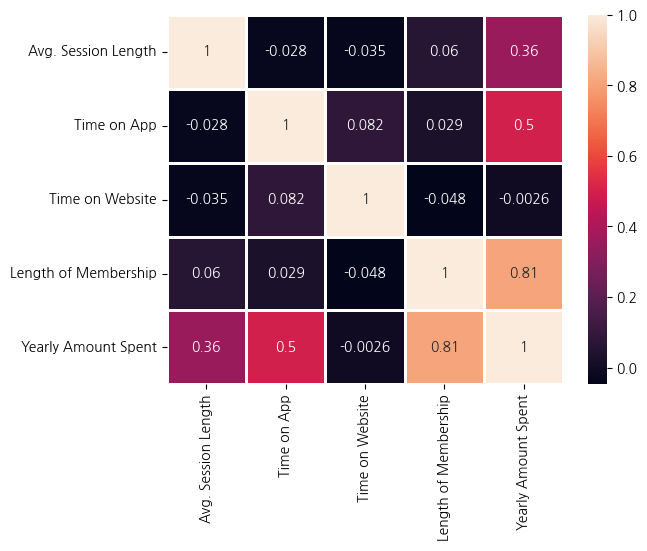

In [14]:
sns.heatmap(data.corr(),annot=True,linewidths=1)

# 데이터 홀드 아웃 및 스케일링

In [15]:
X = data.drop('Yearly Amount Spent',axis=1)
y = data['Yearly Amount Spent']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test ,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# 독립변수의 스케일 맞추기

In [18]:
X_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
249,33.780157,11.917636,36.844734,3.634996
433,34.278248,11.822722,36.308545,2.117383
19,32.617856,13.989593,37.190504,4.064549
322,33.264632,10.732131,36.145792,4.086566
332,33.144234,11.737041,37.935189,2.190132
...,...,...,...,...
106,32.291756,12.190474,36.152462,3.781823
270,34.006489,12.956277,38.655095,3.275734
348,31.812483,10.886921,34.897828,3.128639
435,32.259973,14.132893,37.023479,3.762070


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
ss = StandardScaler()
ss.fit(X_train)
ss_X_train = ss.transform(X_train)
ss_X_test = ss.transform(X_test)

In [21]:
ss_X_train = pd.DataFrame(ss_X_train,index=X_train.index,columns=X_train.columns)
ss_X_test = pd.DataFrame(ss_X_test,index=X_test.index,columns=X_test.columns)

In [22]:
ss_X_test

,Avg. Session Length,Time on App,Time on Website,Length of Membership
361,-0.997132,-1.713455,1.991749,-0.130046
73,-0.256010,0.761003,0.010579,0.276169
374,-1.635907,-1.960221,1.006187,0.652866
155,-0.620106,1.402969,0.214506,-0.610417
104,-1.694561,-1.065741,1.036687,-0.135598
...,...,...,...,...
347,0.718270,-0.754847,0.800082,1.529081
86,0.827716,0.460923,0.129021,-0.874853
75,-1.025263,0.180722,1.682520,-0.435901
438,-0.924682,-2.014653,0.158072,-0.032122


# 다중선형회귀분선으로 연간지출액 예측 모델 만들기

# statsmodel 의 python 문법으로 분석하기

In [23]:
import statsmodels.api as sm

In [24]:
# 상수항 추가 y절편
X_train_const = sm.add_constant(ss_X_train)
X_test_const = sm.add_constant(ss_X_test)

In [25]:
X_train_const

,const,Avg. Session Length,Time on App,Time on Website,Length of Membership
249,1.0,0.728756,-0.140376,-0.173216,0.065197
433,1.0,1.233670,-0.235492,-0.700765,-1.413095
19,1.0,-0.449465,1.935961,0.166982,0.483620
322,1.0,0.206170,-1.328388,-0.860896,0.505068
332,1.0,0.084123,-0.321354,0.899668,-1.342230
...,...,...,...,...,...
106,1.0,-0.780032,0.133039,-0.854333,0.208220
270,1.0,0.958189,0.900460,1.607973,-0.284756
348,1.0,-1.265871,-1.173271,-2.088751,-0.428040
435,1.0,-0.812250,2.079565,0.002649,0.188979


In [26]:
X_test_const

,const,Avg. Session Length,Time on App,Time on Website,Length of Membership
361,1.0,-0.997132,-1.713455,1.991749,-0.130046
73,1.0,-0.256010,0.761003,0.010579,0.276169
374,1.0,-1.635907,-1.960221,1.006187,0.652866
155,1.0,-0.620106,1.402969,0.214506,-0.610417
104,1.0,-1.694561,-1.065741,1.036687,-0.135598
...,...,...,...,...,...
347,1.0,0.718270,-0.754847,0.800082,1.529081
86,1.0,0.827716,0.460923,0.129021,-0.874853
75,1.0,-1.025263,0.180722,1.682520,-0.435901
438,1.0,-0.924682,-2.014653,0.158072,-0.032122


In [27]:
lr = sm.OLS(y_train,X_train_const).fit()
print(lr.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     6676.
Date:                 Thu, 04 Dec 2025   Prob (F-statistic):               0.00
Time:                         15:27:30   Log-Likelihood:                -1480.1
No. Observations:                  400   AIC:                             2970.
Df Residuals:                      395   BIC:                             2990.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

* (25.2504*Avg. Session Length) + (38.7035 * Time on App) + (63.5432 * Length of Membership) + 501.024
* p-value가 0.05이하이므로 유의미하다.
* Adj.R-suared:0.985로 모델의 설명력은 약 98.5%이다

# 회귀분석의 평가지표
* MSE(mean_squared_error): 평균 제곱 오차 - 회귀선과 데이터 간의 오차의 제곱 (편차의 제곱)
* RMSE(root_mean_squared_error): 루트평균 제곱 오차 - 회귀선과 데이터 간의 오차의 제곱의 제곱근 (편차의 제곱의 제곱근)

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
# 회귀 분석 모델로 예측하기
pred = lr.predict(X_test_const)
print("mean_squared_error",mean_squared_error(y_test,pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,pred)))

mean_squared_error 109.8637411839406
mean_squared_error 10.481590584636503


,const,Avg. Session Length,Time on App,Time on Website,Length of Membership
361,1.0,-0.997132,-1.713455,1.991749,-0.130046
73,1.0,-0.256010,0.761003,0.010579,0.276169
374,1.0,-1.635907,-1.960221,1.006187,0.652866
155,1.0,-0.620106,1.402969,0.214506,-0.610417
104,1.0,-1.694561,-1.065741,1.036687,-0.135598
...,...,...,...,...,...
347,1.0,0.718270,-0.754847,0.800082,1.529081
86,1.0,0.827716,0.460923,0.129021,-0.874853
75,1.0,-1.025263,0.180722,1.682520,-0.435901
438,1.0,-0.924682,-2.014653,0.158072,-0.032122


In [31]:
temp1 = pd.DataFrame(y_test)

In [32]:
temp2 = pd.DataFrame(pred)

In [33]:
result = pd.concat([temp1,temp2],axis=1)
result.columns = ['Yearly Amount Spent','pred']
result

,Yearly Amount Spent,pred
361,401.033135,402.862301
73,534.777188,542.533257
374,418.602742,426.620119
155,503.978379,501.913864
104,410.069611,409.666655
...,...,...
347,593.156401,588.328629
86,487.379306,485.181373
75,478.719357,455.930701
438,392.992256,398.678207


In [34]:
result['편차'] = result['Yearly Amount Spent'] - result['pred']
result

,Yearly Amount Spent,pred,편차
361,401.033135,402.862301,-1.829165
73,534.777188,542.533257,-7.756069
374,418.602742,426.620119,-8.017377
155,503.978379,501.913864,2.064515
104,410.069611,409.666655,0.402956
...,...,...,...
347,593.156401,588.328629,4.827772
86,487.379306,485.181373,2.197933
75,478.719357,455.930701,22.788656
438,392.992256,398.678207,-5.685951


# 산점도와 회귀선 그리기

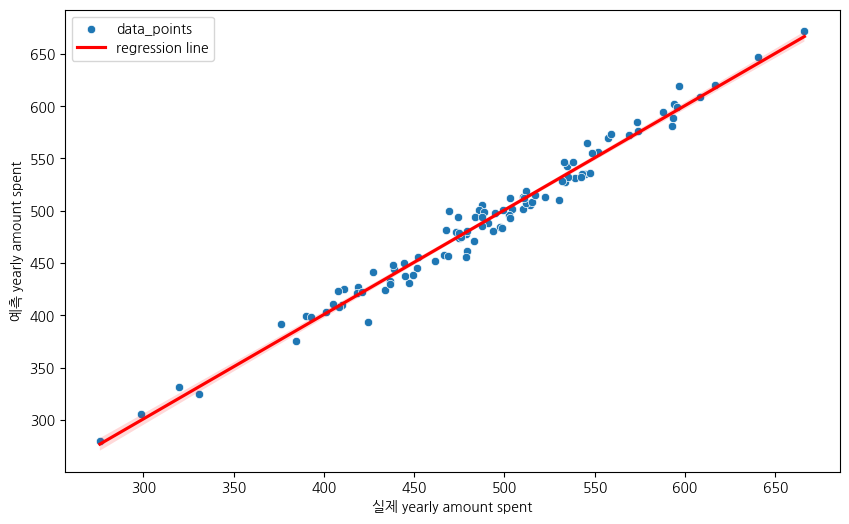

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test,y=pred,label='data_points')
sns.regplot(x=y_test,y=pred,scatter=False,label='regression line',color = 'red')
plt.xlabel("실제 yearly amount spent")
plt.ylabel("예측 yearly amount spent")
plt.legend()
plt.show()

# R문법으로 statsmodels 회귀분석하기

In [36]:
# r문법 방식
from statsmodels.formula.api import ols

R 문법으로 분석할 때는 X,y를 1개의 데이터프레임으로 합쳐줘야 함

In [37]:
train_data = pd.concat([ss_X_train,y_train],axis=1)
train_data

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
249,0.728756,-0.140376,-0.173216,0.065197,518.786483
433,1.233670,-0.235492,-0.700765,-1.413095,434.144202
19,-0.449465,1.935961,0.166982,0.483620,605.061039
322,0.206170,-1.328388,-0.860896,0.505068,478.262126
332,0.084123,-0.321354,0.899668,-1.342230,424.202827
...,...,...,...,...,...
106,-0.780032,0.133039,-0.854333,0.208220,494.551861
270,0.958189,0.900460,1.607973,-0.284756,540.995739
348,-1.265871,-1.173271,-2.088751,-0.428040,392.810345
435,-0.812250,2.079565,0.002649,0.188979,571.216005


In [38]:
test_data = pd.concat([ss_X_test,y_test],axis=1)
test_data

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
361,-0.997132,-1.713455,1.991749,-0.130046,401.033135
73,-0.256010,0.761003,0.010579,0.276169,534.777188
374,-1.635907,-1.960221,1.006187,0.652866,418.602742
155,-0.620106,1.402969,0.214506,-0.610417,503.978379
104,-1.694561,-1.065741,1.036687,-0.135598,410.069611
...,...,...,...,...,...
347,0.718270,-0.754847,0.800082,1.529081,593.156401
86,0.827716,0.460923,0.129021,-0.874853,487.379306
75,-1.025263,0.180722,1.682520,-0.435901,478.719357
438,-0.924682,-2.014653,0.158072,-0.032122,392.992256


In [39]:
train_data.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [40]:
cols = []
for col in train_data.columns:
    cols.append(col.replace(" ","").replace(".",""))
cols

['AvgSessionLength',
 'TimeonApp',
 'TimeonWebsite',
 'LengthofMembership',
 'YearlyAmountSpent']

In [41]:
train_data.columns = cols
train_data

,AvgSessionLength,TimeonApp,TimeonWebsite,LengthofMembership,YearlyAmountSpent
249,0.728756,-0.140376,-0.173216,0.065197,518.786483
433,1.233670,-0.235492,-0.700765,-1.413095,434.144202
19,-0.449465,1.935961,0.166982,0.483620,605.061039
322,0.206170,-1.328388,-0.860896,0.505068,478.262126
332,0.084123,-0.321354,0.899668,-1.342230,424.202827
...,...,...,...,...,...
106,-0.780032,0.133039,-0.854333,0.208220,494.551861
270,0.958189,0.900460,1.607973,-0.284756,540.995739
348,-1.265871,-1.173271,-2.088751,-0.428040,392.810345
435,-0.812250,2.079565,0.002649,0.188979,571.216005


In [42]:
test_data.columns = cols
test_data

,AvgSessionLength,TimeonApp,TimeonWebsite,LengthofMembership,YearlyAmountSpent
361,-0.997132,-1.713455,1.991749,-0.130046,401.033135
73,-0.256010,0.761003,0.010579,0.276169,534.777188
374,-1.635907,-1.960221,1.006187,0.652866,418.602742
155,-0.620106,1.402969,0.214506,-0.610417,503.978379
104,-1.694561,-1.065741,1.036687,-0.135598,410.069611
...,...,...,...,...,...
347,0.718270,-0.754847,0.800082,1.529081,593.156401
86,0.827716,0.460923,0.129021,-0.874853,487.379306
75,-1.025263,0.180722,1.682520,-0.435901,478.719357
438,-0.924682,-2.014653,0.158072,-0.032122,392.992256


In [43]:
x_cols = "+".join(train_data.columns[:-1])

In [44]:
#  ols("YearlyAmountSpent ~ AvgSessionLength+TimeonApp+TimeonWebsite+LengthofMembership",data=train_data).fit() -> 원래 방식
model = ols(f"{train_data.columns[-1]} ~"+ x_cols,data=train_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      YearlyAmountSpent   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     6676.
Date:                Thu, 04 Dec 2025   Prob (F-statistic):               0.00
Time:                        15:27:30   Log-Likelihood:                -1480.1
No. Observations:                 400   AIC:                             2970.
Df Residuals:                     395   BIC:                             2990.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            501.9922      0

In [45]:
x_cols

'AvgSessionLength+TimeonApp+TimeonWebsite+LengthofMembership'

# 사이킷런을 이용한 회귀분석

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lr2 = LinearRegression()
lr2.fit(ss_X_train,y_train)
pred2 = lr2.predict(ss_X_test)
print("mse: ",mean_squared_error(y_test,pred))
print("rmse: ",np.sqrt(mean_squared_error(y_test,pred)))

mse:  109.8637411839406
rmse:  10.481590584636503


In [48]:
# y절편
print("y절편",lr2.intercept_)

y절편 501.9921512124531


In [49]:
# 각 변수의 회귀 계수 coef
print(X_test.columns)
print("각 변수의 회귀계수", lr2.coef_)
coef_df = pd.DataFrame(lr2.coef_,index=X_test.columns,columns=['coef'])
coef_df

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')
각 변수의 회귀계수 [25.25038131 38.70350139  0.31546926 63.54321107]


,coef
Avg. Session Length,25.250381
Time on App,38.703501
Time on Website,0.315469
Length of Membership,63.543211


In [50]:
# r2 출력하기
r2 = lr2.score(ss_X_test,y_test)
print("r2 : ",r2)

r2 :  0.9778130629184125
